In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from scipy.io import loadmat

In [2]:

# Loading Mat file
mat=loadmat('ex3data1.mat')
print(*mat.keys(),sep='\n')

__header__
__version__
__globals__
X
y


In [3]:
# Loading data from mat to Dataframe
m,n=mat['X'].shape

data=pd.DataFrame()
for i in range(n):
    data[f'x{i+1}']=mat['X'].T[i]

# Converting label 10 to label 0
data['y']=mat['y']
data.loc[data['y']==10,'y']=0

print('TRAINING DATASET SHAPE : {0} X {1}'.format(*data.shape))
data.sample(5)

TRAINING DATASET SHAPE : 5000 X 401


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x392,x393,x394,x395,x396,x397,x398,x399,x400,y
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [4]:
def displayData(X):
    m,n=X.shape
    width=int(np.sqrt(n))
    height=int(n/width)
    rows=int(np.floor(np.sqrt(m)))
    cols=int(np.ceil(m/rows))
    totalWidth=cols+cols*width
    displayArray=np.zeros((1,totalWidth))
    rowPadding=np.ones((1,totalWidth))
    colPadding=np.ones((height,1))
    index=0
    for i in range(rows):
        row=colPadding*0
        for j in range(cols):
            if index<m:
                x=X[index].reshape((width,height)).T
                index=index+1
            else:
                x=np.zeros((width,height)).T
            row=np.column_stack((row,x))
            if j<cols-1:
                row=np.column_stack((row,colPadding))
        displayArray=np.row_stack((displayArray,row))
        if i<rows-1:
            displayArray=np.row_stack((displayArray,rowPadding))
    displayArray=np.row_stack((displayArray,rowPadding*0))
    plt.imshow(displayArray,cmap='gray')
    plt.axis('off')

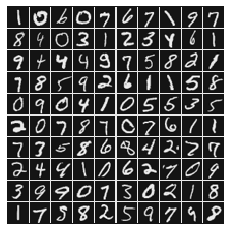

In [5]:

displayData(data.sample(100).iloc[:,:-1].values)

In [6]:
def sigmoid(z):
    sigma=1/(1+np.exp(-z))
    return sigma

In [7]:

def predict(X,theta):
    '''Predicts by applying logistic function on linear model'''
    z=np.dot(X,theta.T)
    h=sigmoid(z)
    return h

In [8]:

def computeCost(h,y):
    '''Computes the cost using Cross Entropy function'''
    m=y.shape[0]
    J=(-1/m)*np.sum(np.multiply(y,np.log(h))+np.multiply(1-y,np.log(1-h)))
    return J

In [9]:
def regularizedGradientDescent(X,y,theta,alpha,lmbda,iterations):
    '''Minimizes the cost function using Gradient Descent Optimization Algorithm'''
    m=X.shape[0]
    jHistory=[]
    for i in range(iterations):
        h=predict(X,theta)
        # Computing cost
        J=computeCost(h,y)
        # Adding the regularized term
        J=J+(lmbda/(2*m))*np.sum(np.power(theta[:,1:],2))
        jHistory.append(J)
        # Parameters update rule
        gradient=(alpha/m)*(np.dot((h-y).T,X))
        # Adding the regularized term
        gradient=gradient+(alpha/m)*lmbda*np.column_stack((np.zeros((1,1)),theta[:,1:]))
        theta=theta-gradient
    return (theta,jHistory)

In [10]:
def oneVsAll(X,Y,alpha,lmbda,iterations):
    '''Returns all the classifier parameters in a matrix with shape of classes X features'''
    m,n=X.shape
    # Initializing theta
    intialTheta=np.zeros(shape=(1,n))
    labels=np.unique(Y)
    thetas=np.zeros(shape=(len(labels),n))
    i=0
    print('Training classifiers...\n')
    for label in labels:
        y=np.zeros(shape=(m,1))
        y[Y==label]=1
        theta,jHistory=regularizedGradientDescent(X,y,intialTheta,alpha,lmbda,iterations)
        thetas[i,:]=theta
        print(f'For classifier{label} , J = {jHistory[iterations-1]:.3f}')
        i+=1
    return thetas

In [11]:
m=data.shape[0]

X=data.values[:,:-1]
# Adding intercept term to the design matrix
intercept=np.ones(shape=(m,1))
X=np.column_stack((intercept,X))
y=data['y'].values.reshape((m,1))

alpha=1
lmbda=0.3
iterations=3000

thetas=oneVsAll(X,y,alpha,lmbda,iterations)

Training classifiers...

For classifier0 , J = 0.016
For classifier1 , J = 0.023
For classifier2 , J = 0.063
For classifier3 , J = 0.067
For classifier4 , J = 0.046
For classifier5 , J = 0.069
For classifier6 , J = 0.030
For classifier7 , J = 0.042
For classifier8 , J = 0.088
For classifier9 , J = 0.083


In [12]:
def predictOneVsAll(thetas,X):
    '''Predic the label for a trained One-vs-all classifier. The labels are in the range 0 to 9'''
    h=predict(X,thetas)
    labels=h.argmax(axis=1)
    return labels.reshape((X.shape[0],1))

In [13]:
def calculateAccuracy(h,y):
    '''Calculates the accuray between the target and prediction'''
    m=y.shape[0]
    unique,counts=np.unique(h==y,return_counts=True)
    dic=dict(zip(unique,counts))
    accuracy=(dic[True]/m)*100
    return accuracy

In [14]:

h=predictOneVsAll(thetas,X)
accuracy=calculateAccuracy(h,y)
print(f'TRAINING ACCURACY : {accuracy:.2f}')

TRAINING ACCURACY : 94.16


In [15]:

# Loading weights
weights=loadmat('ex3weights.mat')
print(*weights.keys(),sep='\n')

__header__
__version__
__globals__
Theta1
Theta2


In [16]:
theta1=weights['Theta1']
theta2=weights['Theta2']
print(f'X : {X.shape}')
print(f'Theta1 : {theta1.shape}')
print(f'Theta2 : {theta2.shape}')

X : (5000, 401)
Theta1 : (25, 401)
Theta2 : (10, 26)


In [17]:
def predictNN(theta1,theta2,X):
    '''Predict the label of an input given a trained neural network'''
    m,n=X.shape
    # Feed Forward Propogation
    a1=X
    z2=np.dot(a1,theta1.T)
    a2=sigmoid(z2)
    a2=np.column_stack((np.ones(shape=(a2.shape[0],1)),a2))
    z3=np.dot(a2,theta2.T)
    a3=sigmoid(z3)
    h=a3
    labels=h.argmax(axis=1)
    return labels.reshape((m,1))


In [18]:
# Using label 10 for digit 0
y=mat['y']

h=predictNN(theta1,theta2,X)
# Adding one to h because matlab indexing starts from 1 whereas python indexing starts from 0
h+=1

accuracy=calculateAccuracy(h,y)
print(f'TRAINING ACCURACY : {accuracy:.2f}')

TRAINING ACCURACY : 97.52
